In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/validation.csv
/kaggle/input/training.csv
/kaggle/input/test.csv


In [2]:
!ls /kaggle/input/

test.csv  training.csv	validation.csv


In [3]:
import torch
import random
import os

def seed_everything(TORCH_SEED):
    random.seed(TORCH_SEED)
    os.environ['PYTHONHASHSEED'] = str(TORCH_SEED)
    np.random.seed(TORCH_SEED)
    torch.manual_seed(TORCH_SEED)
    torch.cuda.manual_seed_all(TORCH_SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(1126)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import pandas as pd
import numpy as np
import panel as pn
import warnings; warnings.filterwarnings('ignore')

validation_data = pd.read_csv('/kaggle/input/validation.csv')
train_data = pd.read_csv('/kaggle/input/training.csv')
test_data = pd.read_csv('/kaggle/input/test.csv')

print('Dataset information:')
print(f'Training data: {train_data.shape}')
print(f'Validation data: {validation_data.shape}')
print(f'Test data: {test_data.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [6]:
labels = train_data['label'].unique()
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

In [7]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sentence_transformers import SentenceTransformer

encode_model = SentenceTransformer('paraphrase-distilroberta-base-v2')
train_embedding = encode_model.encode(train_data['text'])

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
print(train_embedding.shape)

(16000, 768)


In [13]:
valid_embedding = encode_model.encode(validation_data['text'])
test_embedding = encode_model.encode(test_data['text'])

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(train_embedding, train_data['label'])
y_preds = lgb.predict(test_embedding)
# print(classification_report(test_data['label'], y_preds, target_names = labels_dict.values()))

In [25]:
print(classification_report(test_data['label'], y_preds, target_names = labels_dict.values()))

              precision    recall  f1-score   support

     sadness       0.69      0.78      0.73       581
         joy       0.70      0.85      0.77       695
        love       0.55      0.26      0.35       159
       anger       0.67      0.55      0.60       275
        fear       0.62      0.51      0.56       224
    surprise       0.48      0.17      0.25        66

    accuracy                           0.68      2000
   macro avg       0.62      0.52      0.54      2000
weighted avg       0.67      0.68      0.66      2000



In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

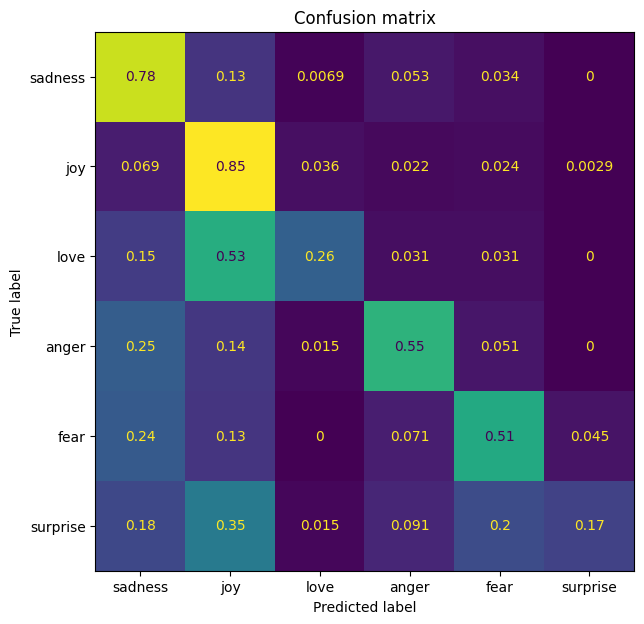

In [27]:
plot_confusion_matrix(y_preds, test_data['label'], labels_dict.values())

In [9]:
from transformers import AutoTokenizer

tokenizer_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [10]:
train_encoding = tokenizer(train_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")
valid_encoding = tokenizer(validation_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")
test_encoding = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")

In [11]:
train_labels = train_data['label']
valid_labels = validation_data['label']
test_labels = test_data['label']

In [12]:
train_encoding['input_ids'].shape[0]

16000

In [13]:
from torch.utils.data import Dataset

class TwitterDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [14]:
train_dataset = TwitterDataset(train_encoding, train_labels)
val_dataset = TwitterDataset(valid_encoding, valid_labels)
test_dataset = TwitterDataset(test_encoding, test_labels)

In [15]:
from transformers import AutoModelForSequenceClassification

num_labels = 6

model_ckpt = "roberta-base"
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, 
        num_labels=num_labels).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [18]:
from transformers import Trainer, TrainingArguments

bs = 32 # batch size
logging_steps = train_encoding['input_ids'].shape[0] // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 6,             # number of training epochs
                                  learning_rate = 1e-5,             # model learning rate
                                  per_device_train_batch_size = bs, # batch size
                                  per_device_eval_batch_size = bs,  # batch size
                                  weight_decay = 0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm = False, 
                                  report_to = "none",
                                  logging_steps = logging_steps,
                                  push_to_hub = False,
                                  log_level = "error",
                                  save_strategy = 'epoch',
                                  save_total_limit=3,
                                  load_best_model_at_end = True)

In [19]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = train_dataset,
                  eval_dataset = val_dataset)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.791200,0.286169,0.902000,0.903613
2,0.256100,0.198578,0.926000,0.926562
3,0.176400,0.170131,0.927500,0.928091
4,0.136000,0.160210,0.933000,0.933056
5,0.120400,0.153249,0.932000,0.932494
6,0.104500,0.153821,0.936000,0.935927


TrainOutput(global_step=3000, training_loss=0.26411683909098305, metrics={'train_runtime': 881.7868, 'train_samples_per_second': 108.87, 'train_steps_per_second': 3.402, 'total_flos': 4341488329728000.0, 'train_loss': 0.26411683909098305, 'epoch': 6.0})

In [20]:
# Predict on testing Dataset
pred_output = trainer.predict(test_dataset)

In [21]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2000,)
Predictions: [0 0 0 ... 1 1 5]


In [22]:
# Show metrics of last iteration
pred_output.metrics

{'test_loss': 0.18389178812503815,
 'test_accuracy': 0.925,
 'test_f1': 0.9259835826899212,
 'test_runtime': 3.6452,
 'test_samples_per_second': 548.667,
 'test_steps_per_second': 17.283}

In [23]:
print(classification_report(test_labels, y_preds, target_names = labels_dict.values()))

              precision    recall  f1-score   support

     sadness       0.95      0.96      0.96       581
         joy       0.96      0.93      0.95       695
        love       0.82      0.89      0.85       159
       anger       0.91      0.93      0.92       275
        fear       0.94      0.83      0.88       224
    surprise       0.67      0.94      0.78        66

    accuracy                           0.93      2000
   macro avg       0.88      0.91      0.89      2000
weighted avg       0.93      0.93      0.93      2000



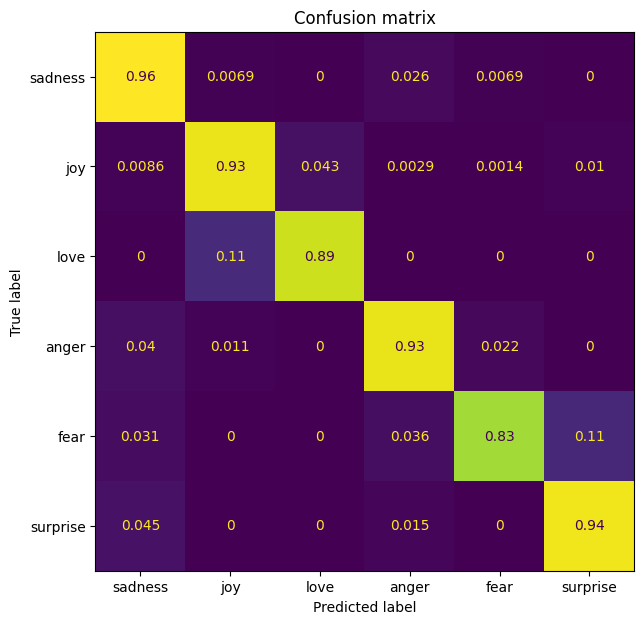

In [24]:
plot_confusion_matrix(y_preds, test_labels, labels_dict.values())

In [51]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [52]:
download_file('/kaggle/working/roberta-base-finetuned-emotion/checkpoint-3000', 'out')

/kaggle/working/out.zip

In [25]:
from transformers import AutoTokenizer

tokenizer_name = "bhadresh-savani/roberta-base-emotion"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [26]:
train_encoding = tokenizer(train_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")
valid_encoding = tokenizer(validation_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")
test_encoding = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, return_tensors="pt")

In [27]:
train_labels = train_data['label']
valid_labels = validation_data['label']
test_labels = test_data['label']

In [28]:
train_dataset = TwitterDataset(train_encoding, train_labels)
val_dataset = TwitterDataset(valid_encoding, valid_labels)
test_dataset = TwitterDataset(test_encoding, test_labels)

In [29]:
from transformers import AutoModelForSequenceClassification

num_labels = 6

model_ckpt = "bhadresh-savani/roberta-base-emotion"
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, 
        num_labels=num_labels).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [30]:
from transformers import Trainer, TrainingArguments

bs = 32 # batch size
logging_steps = train_encoding['input_ids'].shape[0] // bs
model_name = f"{model_ckpt}-finetuned"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 6,             # number of training epochs
                                  learning_rate = 1e-5,             # model learning rate
                                  per_device_train_batch_size = bs, # batch size
                                  per_device_eval_batch_size = bs,  # batch size
                                  weight_decay = 0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm = False, 
                                  report_to = "none",
                                  logging_steps = logging_steps,
                                  push_to_hub = False,
                                  log_level = "error",
                                  save_strategy = 'epoch',
                                  save_total_limit=3,
                                  load_best_model_at_end = True)

In [31]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = train_dataset,
                  eval_dataset = val_dataset)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.107500,0.143066,0.935500,0.936471
2,0.093700,0.154376,0.934000,0.934160
3,0.082700,0.192185,0.933000,0.933057
4,0.070900,0.195090,0.938000,0.937875
5,0.060900,0.212900,0.938000,0.938374
6,0.054300,0.225431,0.937500,0.937721


TrainOutput(global_step=3000, training_loss=0.07834875933329265, metrics={'train_runtime': 880.575, 'train_samples_per_second': 109.02, 'train_steps_per_second': 3.407, 'total_flos': 4341488329728000.0, 'train_loss': 0.07834875933329265, 'epoch': 6.0})

In [32]:
# Predict on testing Dataset
pred_output = trainer.predict(test_dataset)

In [33]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2000,)
Predictions: [0 0 0 ... 1 1 4]


In [34]:
pred_output.metrics

{'test_loss': 0.16216033697128296,
 'test_accuracy': 0.925,
 'test_f1': 0.9267950205421496,
 'test_runtime': 3.6316,
 'test_samples_per_second': 550.716,
 'test_steps_per_second': 17.348}

In [35]:
print(classification_report(test_labels, y_preds, target_names = labels_dict.values()))

              precision    recall  f1-score   support

     sadness       0.97      0.95      0.96       581
         joy       0.98      0.91      0.94       695
        love       0.75      0.96      0.84       159
       anger       0.91      0.95      0.93       275
        fear       0.90      0.89      0.89       224
    surprise       0.69      0.82      0.75        66

    accuracy                           0.93      2000
   macro avg       0.87      0.91      0.89      2000
weighted avg       0.93      0.93      0.93      2000



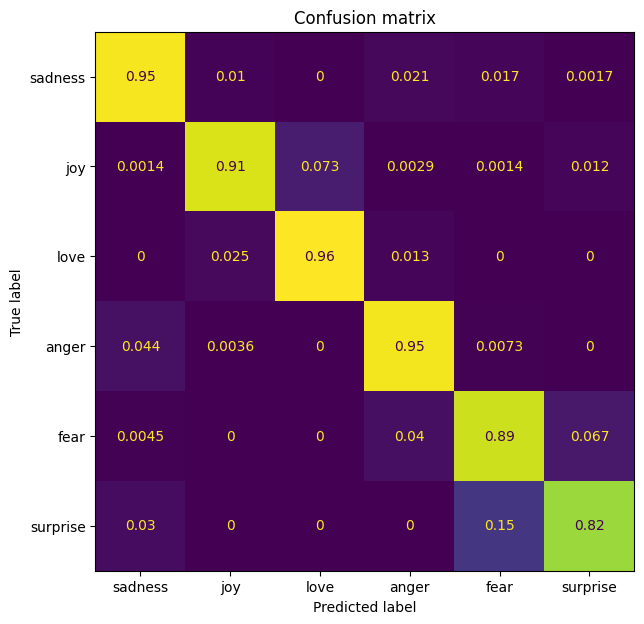

In [36]:
plot_confusion_matrix(y_preds, test_labels, labels_dict.values())

In [37]:
false_idx = list(y_preds != test_labels)
false_data = test_data.iloc[false_idx, :]
false_data['prediction'] = y_preds[false_idx]
false_data.label = false_data.label.map(labels_dict)
false_data.prediction = false_data.prediction.map(labels_dict)

In [38]:
false_data.head()

,text,label,prediction
10,i don t feel particularly agitated,fear,anger
36,i feel very honoured to be included in a magzi...,joy,surprise
67,i feel a bit stressed even though all the thin...,anger,sadness
72,i am right handed however i play billiards lef...,surprise,fear
98,i feel my heart is tortured by what i have done,anger,fear


In [39]:
surprise_false = false_data.loc[false_data.label == 'surprise', :]
surprise_false.head()

,text,label,prediction
72,i am right handed however i play billiards lef...,surprise,fear
152,i was so uncomfortable and feeling weird feeli...,surprise,fear
290,i just feel are ludicrous and wasting space or...,surprise,sadness
671,i feel thats just strange on wotcs behalf,surprise,fear
996,i replied feeling strange at giving the orders,surprise,fear


In [40]:
surprise_false.iloc[0, 0]

'i am right handed however i play billiards left handed naturally so me trying to play right handed feels weird'

In [41]:
surprise_false.iloc[1, 0]

'i was so uncomfortable and feeling weird feelings but wasn t sure if they were contractions since i never really felt contractions with jared until they jacked me up with pitocin'

In [42]:
surprise_false.iloc[4, 0]

'i replied feeling strange at giving the orders'

In [43]:
surprise_false.iloc[5, 0]

'i wonder if the homeowners would feel weird if i parked to gape at their landscaping'

In [44]:
surprise_false.iloc[6, 0]

'i feel shame in a strange way'